In [1]:
# importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Step 1: READING AND UNDERSTANDING DATA


In [2]:
# reading the data
bikes = pd.read_csv('day.csv')
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#shape of the dataframe
bikes.shape

(730, 16)

In [4]:
#checking the summary 
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


no null values in the column

In [5]:
#statistical summary
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Step 2: EDA

Data Cleaning - We need to drop some columns which are redundant: instant(as it is the index), dteday(already split int year and month), casual and registeres (taken care of by cnt)

In [6]:
#dropping columns
bikes = bikes.drop(columns=['instant', 'dteday', 'casual','registered'], axis=1)

In [7]:
#checking if the columns are dropped
bikes.shape

(730, 12)

In [8]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
#reading all the non numeric categorical columns
bikes.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [10]:
bikes.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [11]:
bikes.weekday.value_counts()

1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64

In [12]:
bikes.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

Mapping- All these variables to their original values as mentioned in the data dictionary for ease of interpretation and analysis

In [32]:
bikes.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
bikes.mnth.replace({1:"Jan", 2:"Feb", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"Aug",9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"},inplace = True)
bikes.weekday.replace({1:"Mon", 2:"Tue", 3:"Wed", 4:"Thur", 5:"Fri", 6:"Sat", 0:"Sun", 8:"Aug",9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"},inplace = True)
bikes.weathersit.replace({3:"Light-Rain", 2:"Misty", 1:"Clear", 4:"Heavy-Rain"},inplace = True)

In [33]:
bikes[bikes.weathersit=="Heavy-Rain"].size

0

In [34]:
bikes.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thur,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,Jan,0,Sat,0,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,Jan,0,Sun,0,Misty,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,Jan,0,Mon,1,Misty,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,Jan,0,Tue,1,Clear,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,Jan,0,Wed,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


In [16]:
bikes.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

Analysing & Visualing of variables

<Figure size 432x288 with 0 Axes>

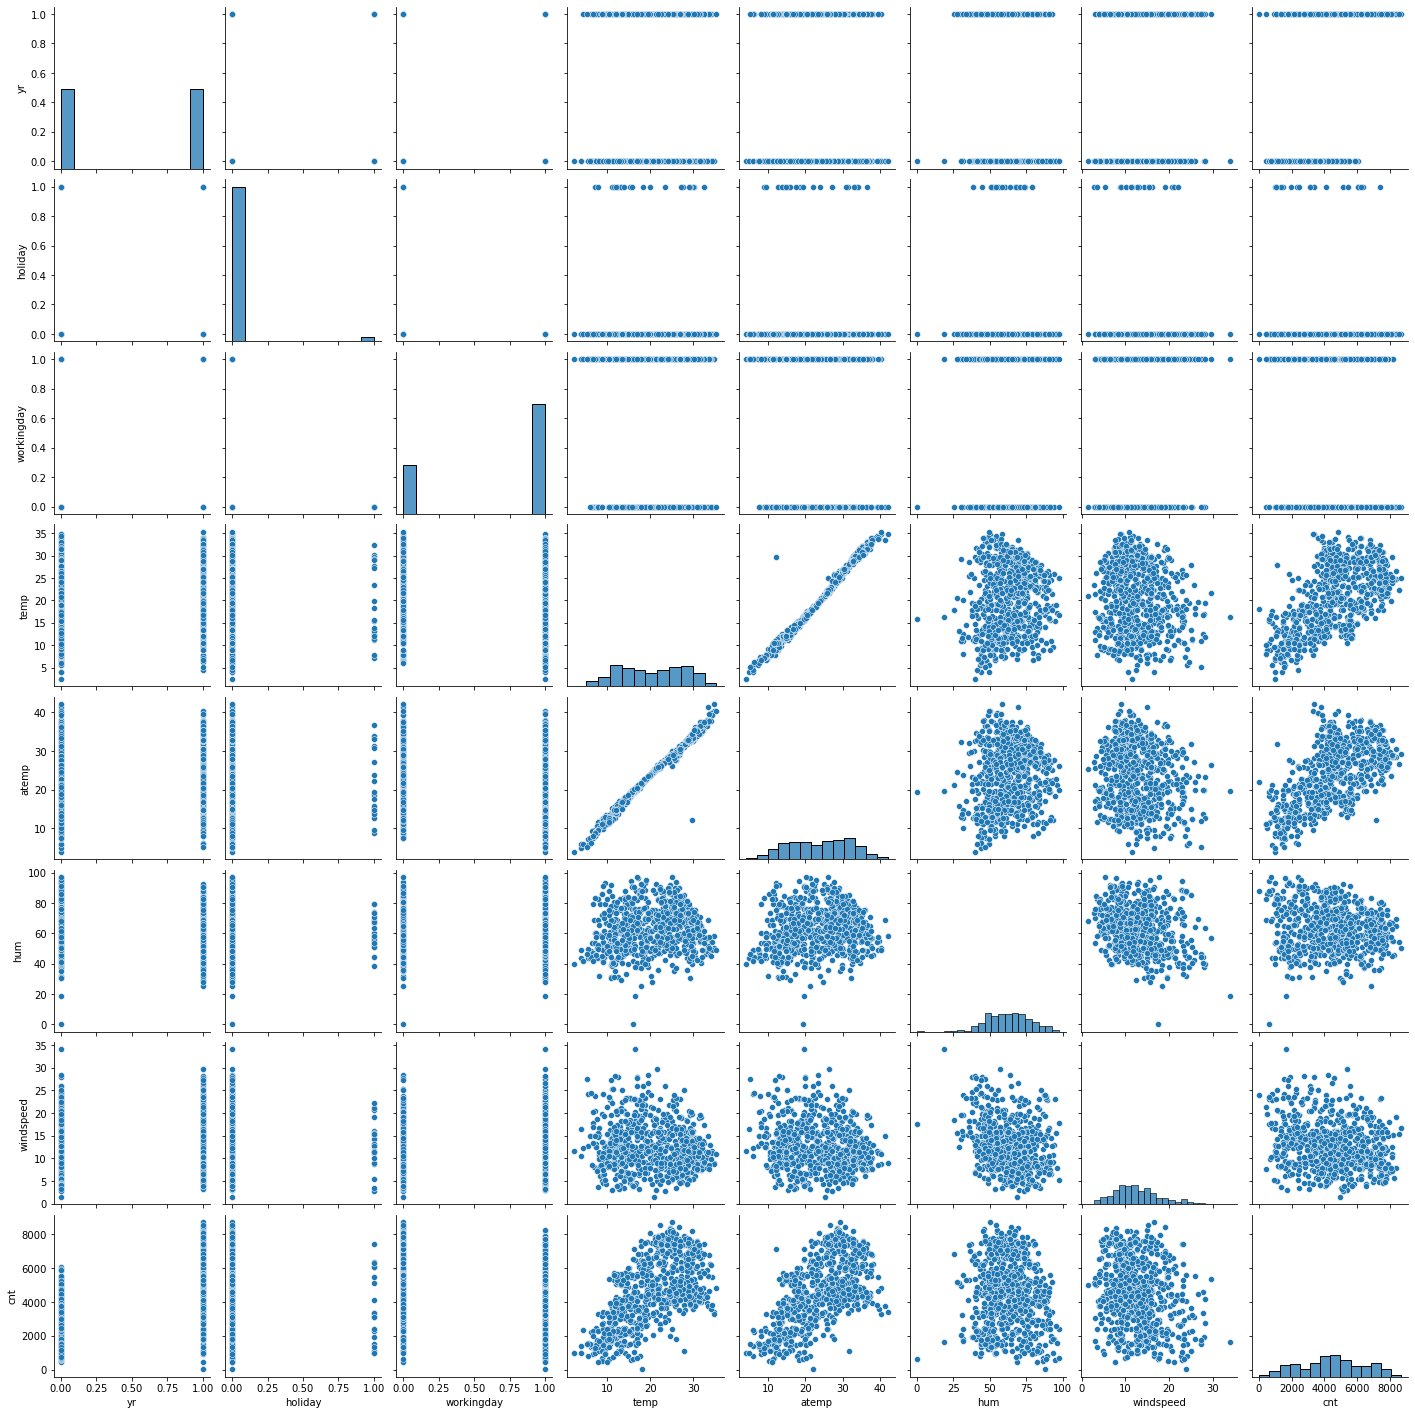

In [17]:
plt.figure()
sns.pairplot(bikes)
plt.show()


INFERENCES :
1. atemp and temp are highly correlated
2. cnt - target variable has a linear relationship with two of the independent variables : temp and atemp

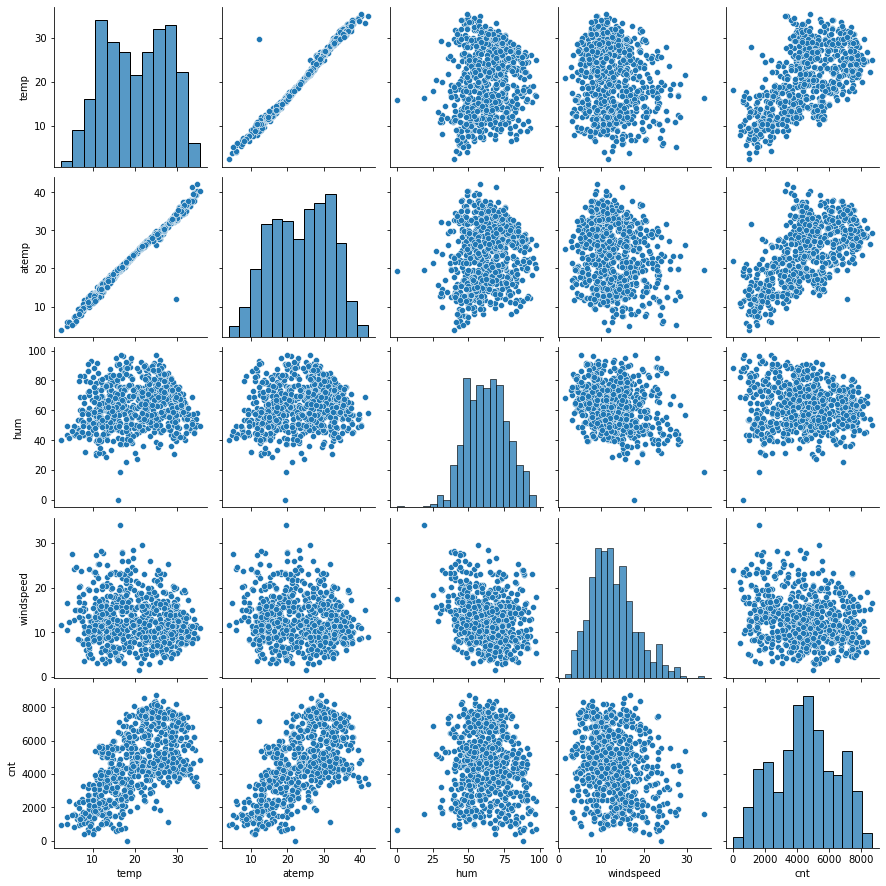

In [18]:
#plotting only non binary numerical variables 
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
sns.pairplot(bikes[num_vars])

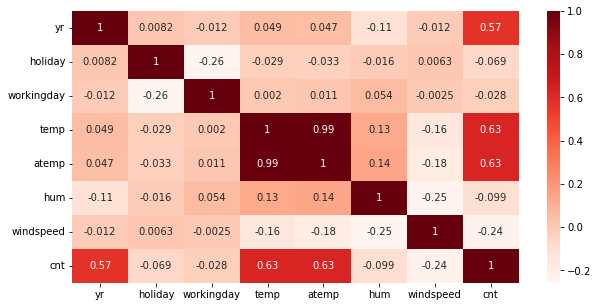

In [19]:
#caculating the correlation coefficients
plt.figure(figsize=(10,5))
sns.heatmap(bikes.corr(), annot=True, cmap="Reds")
plt.show()

INFERENCES:
1. Cnt and year are high positively correlated with a coeff of 0.57
2. Cnt and temp are highly positively correlated with a coeff of 0.63
3. Cnt and atemp are highly positively correlated with a coeff of 0.63
4. Cnt and humidity and windspeed are light negatively correlated
5. Temp and atemo are highly correlated to one another almost close to 1 also because atemp is very closely associated with temp.

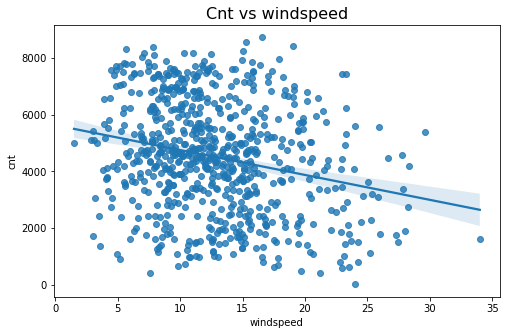

In [20]:
#plotting cnt vs windspeed
plt.figure(figsize=(8,5))
plt.title("Cnt vs windspeed",fontsize=16)
sns.regplot(x='windspeed', y='cnt', data=bikes)
plt.show()

The data points are scattered. not hugging the line.


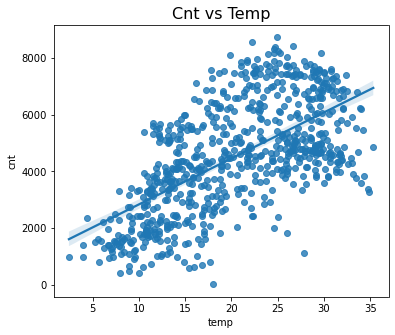

In [21]:
#plotting cnt vs Temp
plt.figure(figsize=(6,5))
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(x='temp', y='cnt', data=bikes)
plt.show()

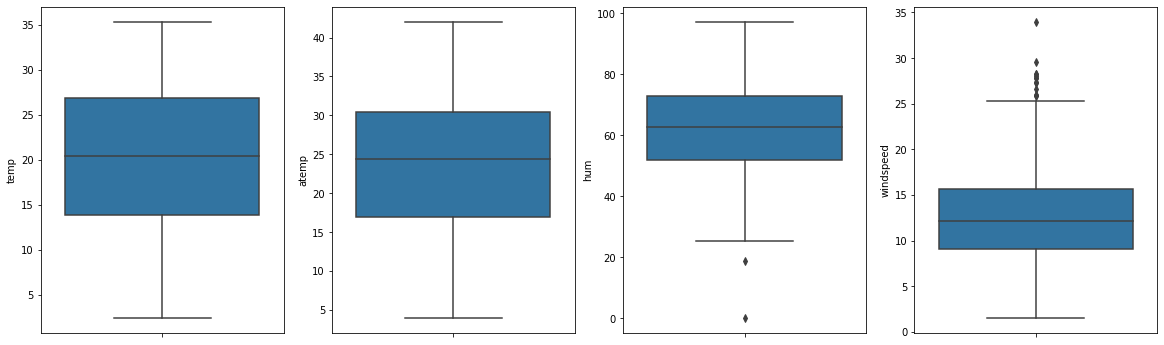

In [22]:
#checking if there are any outliers in the variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(20,6))

i = 1
for j in num_vars:
    plt.subplot(1,4,i)
    sns.boxplot(y=j, data=bikes)
    i+=1

No outliers to be taken care of


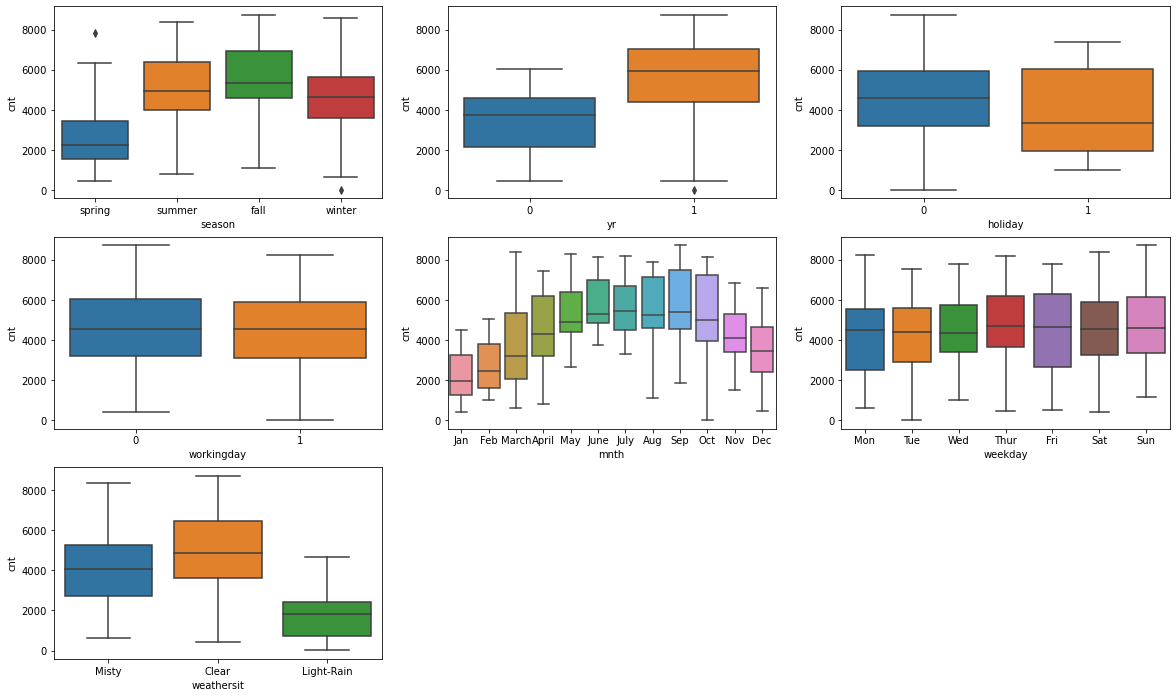

In [23]:
#looking at all the categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes)
plt.subplot(3,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes)
plt.subplot(3,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.show()

INFERENCES:
1. Spring has the lowest demand. Fall has the highest demand followed by summer.
2. Year 2019 had a significant increase in the demand compared to 2018.
3. Less demand on hlidays.
4. Working day or not, the demand seems to be the same.
5. Demand increased during summers and fall starting from Jun till October. September being the highest..The demand is less     during the year end and start.
6. Weekday doesnt give a clear picture.
7. The demand is clearly high on days with clear weather conditions. Extremely low on days with light rain and thunderstorms.There are no records for days with Heavy-Rain conditions.


### Step 3: Data Preparation

Creating dummy variables for categorical variables : 

In [35]:
stats = pd.get_dummies(bikes[["season","mnth","weekday","weathersit"]], drop_first=True)

In [39]:
stats.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_March,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light-Rain,weathersit_Misty
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
#joining stats with bikes
bikes = pd.concat([bikes,stats], axis=1)

In [41]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light-Rain,weathersit_Misty
0,spring,0,Jan,0,Mon,1,Misty,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,Jan,0,Tue,1,Misty,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Thur,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [42]:
#deleting season, yr, mnth and weekday from bikes as dummies have been created
bikes = bikes.drop(columns=["season", "mnth", "weekday", "weathersit"], axis=1)

In [44]:
pd.set_option('display.max_columns',50)
bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_March,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light-Rain,weathersit_Misty
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
bikes.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June',
       'mnth_March', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thur',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Light-Rain',
       'weathersit_Misty'],
      dtype='object')

Train-Test Split

In [46]:
#importing sklearn and statsmodel libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm

In [47]:
df_train, df_test = train_test_split(bikes, train_size=0.7, random_state=1000)

In [48]:
#checking the split
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


Scaling the variables of train set

In [49]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

In [50]:
scaler = MinMaxScaler()
df_train[num_vars]= scaler.fit_transform(df_train[num_vars])

In [51]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_March,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light-Rain,weathersit_Misty
674,1,0,1,0.240884,0.246245,0.584370,0.311545,0.651634,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
477,1,0,1,0.294252,0.272602,0.790039,0.579511,0.367234,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
176,0,0,1,0.762572,0.726076,0.528982,0.148724,0.607800,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
655,1,0,1,0.556729,0.557620,0.750536,0.442296,0.861367,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
607,1,0,0,0.872573,0.795843,0.605410,0.301278,0.843074,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [52]:
#checking scaling
df_train[num_vars].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.521807,0.506313,0.650814,0.347649,0.514320
std,0.238554,0.218741,0.145303,0.161315,0.220002
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.318212,0.323000,0.540738,0.232053,0.367234
50%,0.520243,0.515923,0.655431,0.330128,0.513921
75%,0.732077,0.688654,0.754508,0.435596,0.676542
max,1.000000,1.000000,1.000000,1.000000,1.000000


### Step 4: Training the Model

Create X and y

In [53]:
y_train = df_train.pop('cnt')
X_train = df_train

In [55]:
pd.set_option('display.max_columns',50)
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_March,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light-Rain,weathersit_Misty
674,1,0,1,0.240884,0.246245,0.584370,0.311545,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
477,1,0,1,0.294252,0.272602,0.790039,0.579511,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
176,0,0,1,0.762572,0.726076,0.528982,0.148724,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
655,1,0,1,0.556729,0.557620,0.750536,0.442296,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
607,1,0,0,0.872573,0.795843,0.605410,0.301278,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [56]:
y_train.head()

674    0.651634
477    0.367234
176    0.607800
655    0.861367
607    0.843074
Name: cnt, dtype: float64

Fit the model using sklearn and feature selection using RFE

In [57]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [58]:
#checking for features selection by RFE along with ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 6),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 13),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', False, 4),
 ('mnth_July', True, 1),
 ('mnth_June', False, 11),
 ('mnth_March', False, 12),
 ('mnth_May', False, 3),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 8),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 14),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thur', False, 15),
 ('weekday_Tue', False, 7),
 ('weekday_Wed', False, 9),
 ('weathersit_Light-Rain', True, 1),
 ('weathersit_Misty', True, 1)]

In [59]:
#list of columns selected by RFE
col=X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_Dec', 'mnth_July', 'mnth_Sep',
       'weekday_Sat', 'weekday_Sun', 'weathersit_Light-Rain',
       'weathersit_Misty'],
      dtype='object')

In [60]:
#list of columns not selcted by RFE
X_train.columns[~rfe.support_]

Index(['holiday', 'season_summer', 'mnth_Aug', 'mnth_Feb', 'mnth_Jan',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'weekday_Mon', 'weekday_Thur', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

Building a model using statsmodel with all the features selected by RFE

In [61]:
X_train_rfe = X_train[col]

### Model 1

In [63]:
#add constant as statsmodels by default does not take the intercept.
X_train_sm = sm.add_constant(X_train_rfe)

#fitting the model
lm = sm.OLS(y_train, X_train_sm).fit()

In [64]:
#summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     168.9
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          2.12e-183
Time:                        00:41:37   Log-Likelihood:                 511.39
No. Observations:                 510   AIC:                            -990.8
Df Residuals:                     494   BIC:                            -923.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2594      0.043      6.092      0.000       0.176       0.343
yr                        0.2306      0.008     28.535      0.000       0.215       0.246
workingday                0.0965      0.028      3.460      0.001       0.042       0.151
temp                      0.3484      0.122      2.861      0.004       0.109       0.588
atemp                     0.1193      0.131      0.909      0.364      -0.139       0.377
hum                      -0.1686      0.038     -4.409      0.000      -0.244      -0.093
windspeed                -0.1479      0.027     -5.416      0.000      -0.202      -0.094
season_spring            -0.1110      0.015     -7.437      0.000      -0.140      -0.082
season_winter             0.0713      0.013      5.643      0.000       0.046       0.096
mnth_Dec                 -0.0446      0.016     -2.786      0.006      -0.076      -0.013
mnth_July                -0.0778      0.017     -4.662      0.000      -0.111      -0.045
mnth_Sep                  0.0554      0.017      3.318      0.001       0.023       0.088
weekday_Sat               0.1098      0.029      3.735      0.000       0.052       0.168
weekday_Sun               0.1202      0.029      4.092      0.000       0.063       0.178
weathersit_Light-Rain    -0.2474      0.027     -9.086      0.000      -0.301      -0.194
weathersit_Misty         -0.0493      0.011     -4.619      0.000      -0.070      -0.028
==============================================================================
Omnibus:                       62.359   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.452
Skew:                          -0.617   Prob(JB):                     8.73e-36
Kurtosis:                       5.465   Cond. No.                         79.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
#Calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,325.91
2,temp,305.85
4,hum,29.60
1,workingday,19.42
5,windspeed,5.88
12,weekday_Sun,4.92
11,weekday_Sat,4.81
6,season_spring,2.92
14,weathersit_Misty,2.32
7,season_winter,2.20


### Model 2

In [78]:
#dropping atemp as it has high p value of 0.364 and has a high VIF also.
X= X_train_rfe.drop('atemp', axis=1)

In [69]:
#add constant as statsmodels by default does not take the intercept.
X_train_sm = sm.add_constant(X)

#fitting the model
lm = sm.OLS(y_train, X_train_sm).fit()

In [70]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     181.0
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          2.34e-184
Time:                        00:53:27   Log-Likelihood:                 510.96
No. Observations:                 510   AIC:                            -991.9
Df Residuals:                     495   BIC:                            -928.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2626      0.042      6.190      0.000       0.179       0.346
yr                        0.2303      0.008     28.526      0.000       0.214       0.246
workingday                0.0974      0.028      3.496      0.001       0.043       0.152
temp                      0.4558      0.029     15.518      0.000       0.398       0.514
hum                      -0.1663      0.038     -4.359      0.000      -0.241      -0.091
windspeed                -0.1515      0.027     -5.612      0.000      -0.205      -0.098
season_spring            -0.1111      0.015     -7.450      0.000      -0.140      -0.082
season_winter             0.0725      0.013      5.773      0.000       0.048       0.097
mnth_Dec                 -0.0449      0.016     -2.812      0.005      -0.076      -0.014
mnth_July                -0.0769      0.017     -4.619      0.000      -0.110      -0.044
mnth_Sep                  0.0548      0.017      3.285      0.001       0.022       0.088
weekday_Sat               0.1101      0.029      3.745      0.000       0.052       0.168
weekday_Sun               0.1213      0.029      4.132      0.000       0.064       0.179
weathersit_Light-Rain    -0.2488      0.027     -9.153      0.000      -0.302      -0.195
weathersit_Misty         -0.0494      0.011     -4.631      0.000      -0.070      -0.028
==============================================================================
Omnibus:                       60.693   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.077
Skew:                          -0.603   Prob(JB):                     1.28e-34
Kurtosis:                       5.427   Cond. No.                         26.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Predicitive power is not affected and all the coefficients are significant. Let's check the VIF again

In [71]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.09
1,workingday,19.15
2,temp,15.28
4,windspeed,5.79
11,weekday_Sun,4.86
10,weekday_Sat,4.78
5,season_spring,2.92
13,weathersit_Misty,2.32
6,season_winter,2.16
0,yr,1.99


As clearly seen after dropping an 'atemp' the VIFs of all other variables has reduced.

Now since all other variables have a p-value lower than 0.05 so we need to drop variables based on VIF values as they could be affecting the predictive power.

### Model 3

In [82]:
#dropping hhumidity as it has high VIF value
X= X.drop('hum', axis=1)

In [84]:
#add constant as statsmodels by default does not take the intercept.
X_train_sm = sm.add_constant(X)

#fitting the model
lm = sm.OLS(y_train, X_train_sm).fit()

In [85]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     186.7
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          1.79e-181
Time:                        01:04:54   Log-Likelihood:                 501.36
No. Observations:                 510   AIC:                            -974.7
Df Residuals:                     496   BIC:                            -915.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1643      0.037      4.491      0.000       0.092       0.236
yr                        0.2339      0.008     28.613      0.000       0.218       0.250
workingday                0.0988      0.028      3.483      0.001       0.043       0.155
temp                      0.4331      0.029     14.718      0.000       0.375       0.491
windspeed                -0.1194      0.026     -4.516      0.000      -0.171      -0.067
season_spring            -0.1123      0.015     -7.396      0.000      -0.142      -0.082
season_winter             0.0647      0.013      5.115      0.000       0.040       0.090
mnth_Dec                 -0.0492      0.016     -3.029      0.003      -0.081      -0.017
mnth_July                -0.0702      0.017     -4.158      0.000      -0.103      -0.037
mnth_Sep                  0.0429      0.017      2.558      0.011       0.010       0.076
weekday_Sat               0.1171      0.030      3.920      0.000       0.058       0.176
weekday_Sun               0.1253      0.030      4.197      0.000       0.067       0.184
weathersit_Light-Rain    -0.2949      0.025    -11.575      0.000      -0.345      -0.245
weathersit_Misty         -0.0769      0.009     -8.799      0.000      -0.094      -0.060
==============================================================================
Omnibus:                       60.978   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.996
Skew:                          -0.601   Prob(JB):                     2.98e-35
Kurtosis:                       5.457   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,13.92
2,temp,11.73
3,windspeed,5.73
9,weekday_Sat,3.90
10,weekday_Sun,3.86
4,season_spring,2.65
0,yr,1.99
5,season_winter,1.91
12,weathersit_Misty,1.59
7,mnth_July,1.41


### Model 4

In [87]:
#dropping working day as it has high VIF value
X= X.drop('workingday', axis=1)

In [89]:
#add constant as statsmodels by default does not take the intercept.
X_train_sm = sm.add_constant(X)

#fitting the model
lm = sm.OLS(y_train, X_train_sm).fit()

In [90]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     196.8
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          4.87e-180
Time:                        01:13:04   Log-Likelihood:                 495.20
No. Observations:                 510   AIC:                            -964.4
Df Residuals:                     497   BIC:                            -909.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2615      0.024     10.942      0.000       0.215       0.308
yr                        0.2329      0.008     28.193      0.000       0.217       0.249
temp                      0.4305      0.030     14.471      0.000       0.372       0.489
windspeed                -0.1159      0.027     -4.337      0.000      -0.168      -0.063
season_spring            -0.1162      0.015     -7.591      0.000      -0.146      -0.086
season_winter             0.0633      0.013      4.954      0.000       0.038       0.088
mnth_Dec                 -0.0520      0.016     -3.168      0.002      -0.084      -0.020
mnth_July                -0.0704      0.017     -4.128      0.000      -0.104      -0.037
mnth_Sep                  0.0439      0.017      2.595      0.010       0.011       0.077
weekday_Sat               0.0213      0.012      1.806      0.072      -0.002       0.045
weekday_Sun               0.0296      0.012      2.502      0.013       0.006       0.053
weathersit_Light-Rain    -0.2923      0.026    -11.349      0.000      -0.343      -0.242
weathersit_Misty         -0.0751      0.009     -8.513      0.000      -0.092      -0.058
==============================================================================
Omnibus:                       72.898   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.837
Skew:                          -0.735   Prob(JB):                     8.89e-40
Kurtosis:                       5.510   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
#calculating VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.94
2,windspeed,4.80
0,yr,1.98
3,season_spring,1.89
4,season_winter,1.53
11,weathersit_Misty,1.53
6,mnth_July,1.38
5,mnth_Dec,1.25
9,weekday_Sun,1.22
8,weekday_Sat,1.21


### Model 5

Dropping working day has increased the p value of Weekday-Sat so let's drop 'weekday_Sat'

In [92]:
#dropping weekday_Sat as it has high p value
X= X.drop('weekday_Sat', axis=1)

In [93]:
#add constant as statsmodels by default does not take the intercept.
X_train_sm = sm.add_constant(X)

#fitting the model
lm = sm.OLS(y_train, X_train_sm).fit()

In [94]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     213.5
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          1.64e-180
Time:                        01:22:33   Log-Likelihood:                 493.53
No. Observations:                 510   AIC:                            -963.1
Df Residuals:                     498   BIC:                            -912.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2634      0.024     11.009      0.000       0.216       0.310
yr                        0.2332      0.008     28.164      0.000       0.217       0.249
temp                      0.4321      0.030     14.500      0.000       0.374       0.491
windspeed                -0.1145      0.027     -4.276      0.000      -0.167      -0.062
season_spring            -0.1156      0.015     -7.538      0.000      -0.146      -0.085
season_winter             0.0632      0.013      4.936      0.000       0.038       0.088
mnth_Dec                 -0.0514      0.016     -3.125      0.002      -0.084      -0.019
mnth_July                -0.0708      0.017     -4.140      0.000      -0.104      -0.037
mnth_Sep                  0.0447      0.017      2.633      0.009       0.011       0.078
weekday_Sun               0.0259      0.012      2.215      0.027       0.003       0.049
weathersit_Light-Rain    -0.2926      0.026    -11.337      0.000      -0.343      -0.242
weathersit_Misty         -0.0748      0.009     -8.461      0.000      -0.092      -0.057
==============================================================================
Omnibus:                       72.689   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.088
Skew:                          -0.733   Prob(JB):                     1.29e-39
Kurtosis:                       5.505   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
#calculating VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.86
2,windspeed,4.78
0,yr,1.98
3,season_spring,1.88
10,weathersit_Misty,1.53
4,season_winter,1.52
6,mnth_July,1.38
5,mnth_Dec,1.25
8,weekday_Sun,1.18
7,mnth_Sep,1.16


In [118]:
new_cols=X.columns
new_cols

Index(['yr', 'temp', 'windspeed', 'season_spring', 'season_winter', 'mnth_Dec',
       'mnth_July', 'mnth_Sep', 'weekday_Sun', 'weathersit_Light-Rain',
       'weathersit_Misty'],
      dtype='object')

### Step 5: Residual Analysis

In [96]:
#predicting y
y_train_pred = lm.predict(X_train_sm)

In [97]:
#calculating residuals
res = y_train - y_train_pred

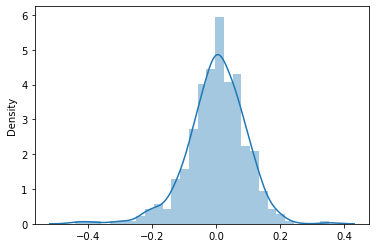

In [98]:
#plotting residuals
sns.distplot(res)
plt.show()

The error terms are normally distributed with mean centered at 0.0

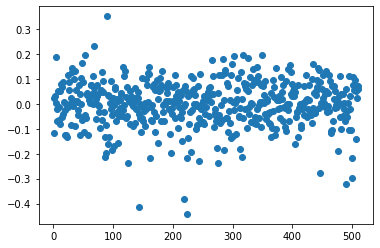

In [103]:
c = [i for i in range(1,511,1)]
fig = plt.figure()
plt.scatter(c,res)

Error Terms are randomly scattered. No visible pattern.

### Step 6: Predictions on test set

In [104]:
#Scaling same variables in test
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

In [105]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [106]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_March,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light-Rain,weathersit_Misty
310,0,0,1,0.390094,0.407020,0.781880,0.071811,0.461689,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
320,0,0,0,0.320391,0.302378,0.593387,0.583358,0.348711,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
189,0,0,1,0.832275,0.761827,0.627737,0.299998,0.611367,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
382,1,0,1,0.270290,0.237738,0.456848,0.810267,0.385872,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
388,1,0,1,0.321479,0.337264,0.861313,0.208991,0.496664,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [107]:
#create X and y for test
y_test = df_test.pop('cnt')
X_test = df_test

In [108]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_March,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light-Rain,weathersit_Misty
310,0,0,1,0.390094,0.407020,0.781880,0.071811,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
320,0,0,0,0.320391,0.302378,0.593387,0.583358,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
189,0,0,1,0.832275,0.761827,0.627737,0.299998,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
382,1,0,1,0.270290,0.237738,0.456848,0.810267,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
388,1,0,1,0.321479,0.337264,0.861313,0.208991,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [109]:
y_test.head()

310    0.461689
320    0.348711
189    0.611367
382    0.385872
388    0.496664
Name: cnt, dtype: float64

In [110]:
#dropping columns from X_test
X_test = X_test.drop(columns=['atemp','hum','workingday','weekday_Sat'],axis=1)

In [112]:
X_test.head()

,yr,holiday,temp,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_March,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light-Rain,weathersit_Misty
310,0,0,0.390094,0.071811,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
320,0,0,0.320391,0.583358,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
189,0,0,0.832275,0.299998,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
382,1,0,0.270290,0.810267,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
388,1,0,0.321479,0.208991,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [119]:
X_test_new = X_test[new_cols]

In [120]:
X_test_new.columns

Index(['yr', 'temp', 'windspeed', 'season_spring', 'season_winter', 'mnth_Dec',
       'mnth_July', 'mnth_Sep', 'weekday_Sun', 'weathersit_Light-Rain',
       'weathersit_Misty'],
      dtype='object')

In [121]:
#adding constant
X_test_sm = sm.add_constant(X_test_new)

In [122]:
#Predciting y
y_test_pred = lm.predict(X_test_sm)

### Step 7 : Evaluating the model

In [123]:
from sklearn.metrics import r2_score

In [125]:
print(r2_score(y_test , y_test_pred))
print(r2_score(y_train , y_train_pred))

0.8233441896486812
0.825020060897047


The R sqaured for Train set is 82.5 ad that for Test set is 82.3

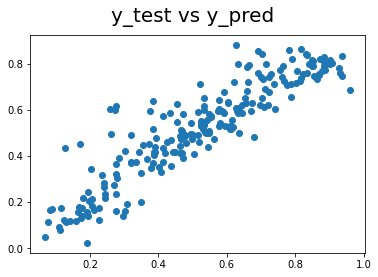

In [128]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.show()

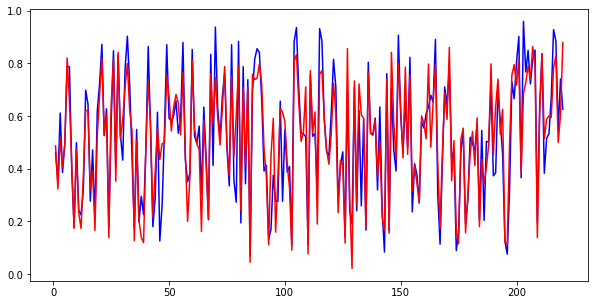

In [133]:
#Actual vs Predicted
c = [i for i in range(1,221,1)]
fig = plt.figure(figsize=(10,5))
plt.plot(c,y_test, color="blue", linewidth=1.5, linestyle="-")
plt.plot(c,y_test_pred, color="red",  linewidth=1.5, linestyle="-")
plt.show()


Actual and Predicted values are very close to each other.

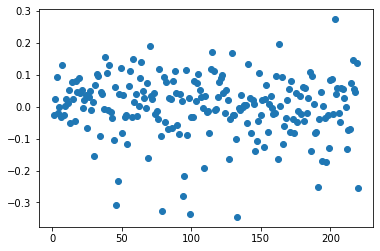

In [134]:
#Error Terms
c = [i for i in range(1,221,1)]
fig = plt.figure()
plt.scatter(c,y_test-y_test_pred)

Error terms are randomly scattered. No visible pattern

## Inference

1. Company is expected to see a hike in demand in the month of September i.e Fall season starting September onwards in US.
2. Company should focus on stratergizing better for Spring season as the demand is likely to decrease during that season.
3. Weather also plays a very important role. Business is likely to get affected on misty days and days with light snow, rain and thunderstorms.
4. Sales are likely to go up when the pandemic situation is over as there's a signicant growth in business in 2019 compared to 2018.
5. Demands are expected to hike up on days with comparitvely high temperatures and clear weather and less windy.
6. Sundays are expected to be good days for business.

Final Equation:

cnt = 0.263 + 0.23*yr + 0.43*temp - 0.11*windspeed - 0.12* season_spring + 0.06*season_winter - 0.05* mnth_Dec - 0.07*mnth_July + 0.04*mnth_Sep + 0.03*weekday_Sun - 0.29*weathersit_Light-Rain - 0.07*weathersit_Misty